In [2]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from math import sqrt
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [3]:
# read the house data spreadsheet
dataset = pd.read_csv('housing_data.csv')

In [4]:
# split the dataset into features and the prediction
data = dataset.iloc[:,].values
X = dataset.iloc[:,:15].values
y = dataset.iloc[:,3].values

In [5]:
waterfront = dataset['waterfront']
renovated = dataset['renovated']

In [6]:
# convert binary categorical data (waterfront, renovated)
le = LabelEncoder()
X[:,0] = le.fit_transform(waterfront)
X[:,1] = le.fit_transform(renovated)

In [7]:
# Break data into test and train data (not to be used until part c)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [8]:
# simple linear regression
sqft_living = (dataset[['sqft_living']])
y = dataset[['price']]

In [9]:
# split the sqft_living into test and train data
X_train, X_test, y_train, y_test = train_test_split(sqft_living,y,test_size = 0.2, random_state = 0)

In [10]:
# linear regression for sqft_living and price
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

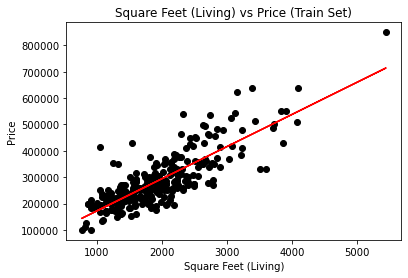

In [11]:
# Visualize Train Set Results
plt.scatter(X_train, y_train, color = 'black')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.title("Square Feet (Living) vs Price (Train Set)")
plt.xlabel("Square Feet (Living)")
plt.ylabel("Price")
plt.show()

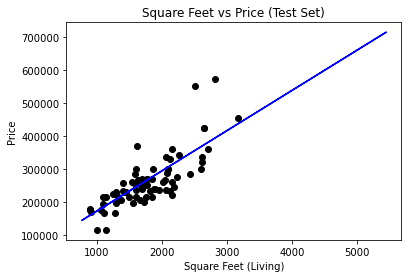

In [12]:
# Visualize Train Set Results
plt.scatter(X_test, y_test, color = 'black')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title("Square Feet vs Price (Test Set)")
plt.xlabel("Square Feet (Living)")
plt.ylabel("Price")
plt.show()

In [13]:
# Predict House Prices Given Parameters
y1 = regressor.predict([[2510]])
print(y1)
y2 = regressor.predict([[1500]])
print(y2)
y3 = regressor.predict([[2870]])
print(y3)
y4 = regressor.predict([[4083]])
print(y4)
y5 = regressor.predict([[4500]])
print(y5)
y6 = regressor.predict([[2870]])
print(y6)
y7 = regressor.predict([[750]])
print(y7)

[[356363.12752274]]
[[232887.30257624]]
[[400374.31265219]]
[[548667.55588001]]
[[599647.17865495]]
[[400374.31265219]]
[[141197.33355656]]


In [14]:
# R-Squared Value:
regressor.score(X_train,y_train)

0.6682006794899293

In [15]:
y = dataset.iloc[:, -1].values
X

array([[0, 0, 0, ..., 59, 2130, 20000],
       [0, 0, 0, ..., 42, 1480, 17334],
       [0, 1, 0, ..., 52, 828, 5402],
       ...,
       [0, 0, 0, ..., 6, 2120, 18900],
       [0, 0, 2, ..., 6, 2673, 6500],
       [1, 0, 0, ..., 15, 2430, 41382]], dtype=object)

In [16]:
# Break data into test and train data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [17]:
multregressor = LinearRegression()
multregressor.fit(X_train,y_train)

LinearRegression()

In [18]:
m1 = multregressor.predict([[0, 0, 0, 3, 3, 3, 0.75, 2510, 20000, 2.0, 2510, 0, 59, 2130, 20000]])
print(m1)
m2 = multregressor.predict([[0, 0, 0, 3, 3, 4, 2.25, 1500, 5393, 2.0, 1500, 0, 21, 1500, 5952]])
print(m2)
m3 = multregressor.predict([[0, 0, 0, 3, 3, 4, 2.25, 2870, 5393, 2.0, 2870, 0, 21, 1500, 41382]])
print(m3)
m4 = multregressor.predict([[0, 0, 0, 3, 3, 4, 3.50, 4083, 68377, 2.0, 4083, 0, 15, 2430, 41382]])
print(m4)
m5 = multregressor.predict([[0, 0, 0, 3, 3, 4, 3.50, 4500, 68377, 2.0, 4500, 0, 15, 2430, 41382]])
print(m5)
m6 = multregressor.predict([[0, 0, 0, 3, 3, 4, 3.50, 2870, 68377, 2.0, 2870, 0, 15, 2430, 41382]])
print(m6)
m7 = multregressor.predict([[0, 0, 0, 3, 3, 4, 3.50, 750, 68377, 2.0, 750, 0, 15, 2430, 41382]])
print(m7)

[322853.75707537]
[223043.61780165]
[402892.93768066]
[557862.19128196]
[588308.23996124]
[469298.50531561]
[314512.83816915]


In [19]:
# R-Squared Value:
multregressor.score(X_train,y_train)

0.8072554741507528

In [20]:
# decision tree
decisionregressor = DecisionTreeRegressor(random_state = 0)
decisionregressor.fit(X,y)

DecisionTreeRegressor(random_state=0)

In [21]:
d1 = decisionregressor.predict([[0, 0, 0, 3, 3, 3, 0.75, 2510, 20000, 2.0, 2510, 0, 59, 2130, 20000]])
print(d1)
d2 = decisionregressor.predict([[0, 0, 0, 3, 3, 4, 2.25, 1500, 5393, 2.0, 1500, 0, 21, 1500, 5952]])
print(d2)
d3 = decisionregressor.predict([[0, 0, 0, 3, 3, 4, 2.25, 2870, 5393, 2.0, 2870, 0, 21, 1500, 41382]])
print(d3)
d4 = decisionregressor.predict([[0, 0, 0, 3, 3, 4, 3.50, 4083, 68377, 2.0, 4083, 0, 15, 2430, 41382]])
print(d4)
d5 = decisionregressor.predict([[0, 0, 0, 3, 3, 4, 3.50, 4500, 68377, 2.0, 4500, 0, 15, 2430, 41382]])
print(d5)
d6 = decisionregressor.predict([[0, 0, 0, 3, 3, 4, 3.50, 2870, 68377, 2.0, 2870, 0, 15, 2430, 41382]])
print(d6)
d7 = decisionregressor.predict([[0, 0, 0, 3, 3, 4, 3.50, 750, 68377, 2.0, 750, 0, 15, 2430, 41382]])
print(d7)

[363000.]
[215000.]
[299000.]
[359000.]
[359000.]
[359000.]
[194820.]


In [22]:
# R-Squared Decision Tree
decisionregressor.score(X_train,y_train)

0.9952504116289396

In [23]:
# Random Forest Regression
forestregressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
forestregressor.fit(X,y)

RandomForestRegressor(n_estimators=10, random_state=0)

In [24]:
rf1 = forestregressor.predict([[0, 0, 0, 3, 3, 3, 0.75, 2510, 20000, 2.0, 2510, 0, 59, 2130, 20000]])
print(rf1)
rf2 = forestregressor.predict([[0, 0, 0, 3, 3, 4, 2.25, 1500, 5393, 2.0, 1500, 0, 21, 1500, 5952]])
print(rf2)
rf3 = forestregressor.predict([[0, 0, 0, 3, 3, 4, 2.25, 2870, 5393, 2.0, 2870, 0, 21, 1500, 41382]])
print(rf3)
rf4 = forestregressor.predict([[0, 0, 0, 3, 3, 4, 3.50, 4083, 68377, 2.0, 4083, 0, 15, 2430, 41382]])
print(rf4)
rf5 = forestregressor.predict([[0, 0, 0, 3, 3, 4, 3.50, 4500, 68377, 2.0, 4500, 0, 15, 2430, 41382]])
print(rf5)
rf6 = forestregressor.predict([[0, 0, 0, 3, 3, 4, 3.50, 2870, 68377, 2.0, 2870, 0, 15, 2430, 41382]])
print(rf6)
rf7 = forestregressor.predict([[0, 0, 0, 3, 3, 4, 3.50, 750, 68377, 2.0, 750, 0, 15, 2430, 41382]])
print(rf7)

[405900.]
[218050.]
[317590.]
[474178.8]
[474178.8]
[422128.8]
[294180.]


In [25]:
forestregressor.score(X_train,y_train)

0.9503025303839485

In [26]:
# Problem 3
print(multregressor.coef_)

[ 8.90689220e+04  4.81272955e+04  1.59078621e+04  7.76704263e+03
  3.35765190e+04 -6.92876340e+03  4.32242173e+03  4.66709071e+01
  6.49099103e-01 -4.18199657e+03  2.63412000e+01  2.03297072e+01
 -6.92693042e+02  1.71650799e+01  2.25297017e+00]


Feature: 0, Score: 89068.92202
Feature: 1, Score: 48127.29548
Feature: 2, Score: 15907.86205
Feature: 3, Score: 7767.04263
Feature: 4, Score: 33576.51902
Feature: 5, Score: -6928.76340
Feature: 6, Score: 4322.42173
Feature: 7, Score: 46.67091
Feature: 8, Score: 0.64910
Feature: 9, Score: -4181.99657
Feature: 10, Score: 26.34120
Feature: 11, Score: 20.32971
Feature: 12, Score: -692.69304
Feature: 13, Score: 17.16508
Feature: 14, Score: 2.25297


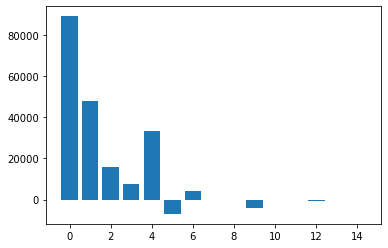

In [28]:
# source: https://machinelearningmastery.com/calculate-feature-importance-with-python/
importance = multregressor.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()